In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('wibit-validation.csv')

In [ ]:
df

,fast-all,fast-bad,form-all,form-bad,chat-exp-all,chat-exp-bad,chat-know-all,chat-know-bad,city-from-base,city
0,10,5,8,1,8,3,10,5,1,Kraków
1,14,11,14,4,14,10,14,9,0,Kłodzko
2,9,6,8,3,12,3,8,2,1,Warszawa
3,44,22,17,1,43,21,41,20,1,Wrocław
4,14,6,11,3,15,5,15,5,0,Bochnia
5,8,4,12,5,8,3,8,3,1,Warszawa
6,10,4,12,4,10,3,11,4,0,Tarnów
7,7,4,10,2,7,3,9,4,1,Poznań
8,13,8,13,8,13,8,13,8,0,Toruń
9,5,3,9,4,6,2,6,2,0,Olsztyn


In [ ]:
df['fast-good-stat'] = 1 - df['fast-bad']/df['fast-all']

In [ ]:
df['form-good-stat'] = 1 - df['form-bad']/df['form-all']
df['chat-exp-good-stat'] = 1 - df['chat-exp-bad']/df['chat-exp-all']
df['chat-know-good-stat'] = 1 - df['chat-know-bad']/df['chat-know-all']

In [ ]:
df

,fast-all,fast-bad,form-all,form-bad,chat-exp-all,chat-exp-bad,chat-know-all,chat-know-bad,city-from-base,city,fast-good-stat,form-good-stat,chat-exp-good-stat,chat-know-good-stat
0,10,5,8,1,8,3,10,5,1,Kraków,0.500000,0.875000,0.625000,0.500000
1,14,11,14,4,14,10,14,9,0,Kłodzko,0.214286,0.714286,0.285714,0.357143
2,9,6,8,3,12,3,8,2,1,Warszawa,0.333333,0.625000,0.750000,0.750000
3,44,22,17,1,43,21,41,20,1,Wrocław,0.500000,0.941176,0.511628,0.512195
4,14,6,11,3,15,5,15,5,0,Bochnia,0.571429,0.727273,0.666667,0.666667
5,8,4,12,5,8,3,8,3,1,Warszawa,0.500000,0.583333,0.625000,0.625000
6,10,4,12,4,10,3,11,4,0,Tarnów,0.600000,0.666667,0.700000,0.636364
7,7,4,10,2,7,3,9,4,1,Poznań,0.428571,0.800000,0.571429,0.555556
8,13,8,13,8,13,8,13,8,0,Toruń,0.384615,0.384615,0.384615,0.384615
9,5,3,9,4,6,2,6,2,0,Olsztyn,0.400000,0.555556,0.666667,0.666667


In [ ]:
calculated_cats = [col for col in list(df.columns) if col[-4:] == 'stat']
calculated_cats

['fast-good-stat',
 'form-good-stat',
 'chat-exp-good-stat',
 'chat-know-good-stat']

In [ ]:
df_in_base = df[df['city-from-base'] == 1][calculated_cats]
df_in_base

,fast-good-stat,form-good-stat,chat-exp-good-stat,chat-know-good-stat
0,0.500000,0.875000,0.625000,0.500000
2,0.333333,0.625000,0.750000,0.750000
3,0.500000,0.941176,0.511628,0.512195
5,0.500000,0.583333,0.625000,0.625000
7,0.428571,0.800000,0.571429,0.555556
10,0.272727,0.600000,0.500000,0.454545
12,0.500000,0.850000,0.625000,0.800000


In [ ]:
df_no_base = df[df['city-from-base'] == 0][calculated_cats]
df_no_base

,fast-good-stat,form-good-stat,chat-exp-good-stat,chat-know-good-stat
1,0.214286,0.714286,0.285714,0.357143
4,0.571429,0.727273,0.666667,0.666667
6,0.600000,0.666667,0.700000,0.636364
8,0.384615,0.384615,0.384615,0.384615
9,0.400000,0.555556,0.666667,0.666667
11,0.333333,0.666667,0.700000,0.571429


In [ ]:
no_base_mean = df_no_base.mean()
no_base_mean

fast-good-stat         0.417277
form-good-stat         0.619177
chat-exp-good-stat     0.567277
chat-know-good-stat    0.547147
dtype: float64

In [ ]:
in_base_mean = df_in_base.mean()
in_base_mean

fast-good-stat         0.433519
form-good-stat         0.753501
chat-exp-good-stat     0.601151
chat-know-good-stat    0.599614
dtype: float64

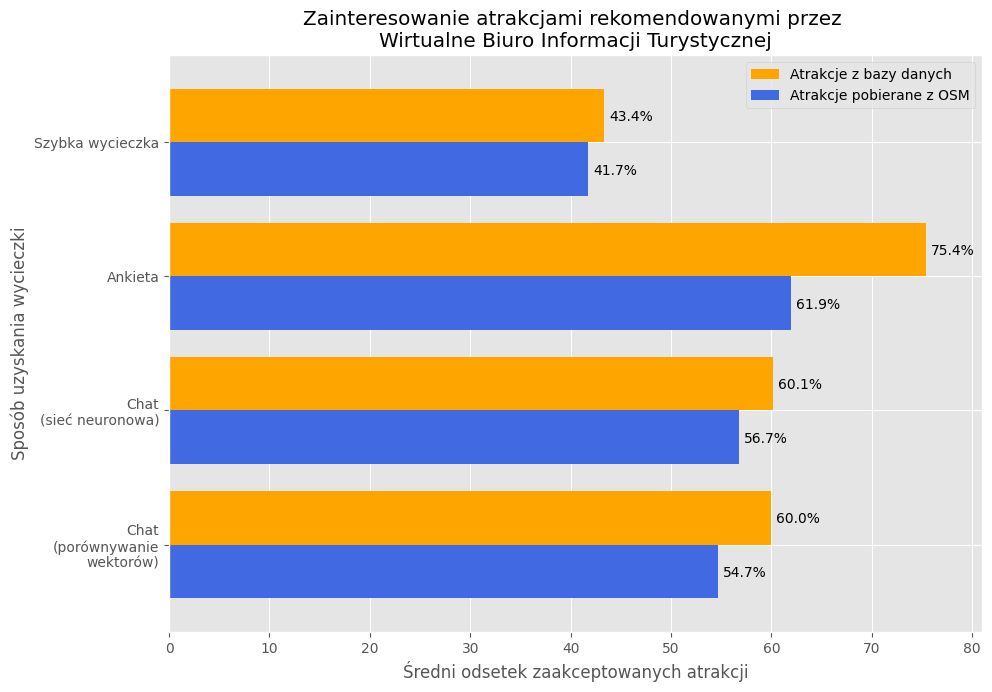

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

comparison_df = pd.concat([in_base_mean, no_base_mean], axis=1, keys=['Atrakcje z bazy danych', 'Atrakcje pobierane z OSM'])*100

ax = comparison_df.plot(kind='barh', color=['orange', 'royalblue'], figsize=(10, 7), width=0.8)

ax.invert_yaxis()
ax.set_yticklabels(["Szybka wycieczka", "Ankieta", "Chat\n(sieć neuronowa)", "Chat\n(porównywanie\nwektorów)"])
ax.set_xlim(0, 81)


for p in ax.patches:
    percentage = f'{p.get_width():.1f}%'
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2 + 0.04
    ax.annotate(percentage, (x, y))

plt.title('Zainteresowanie atrakcjami rekomendowanymi przez \nWirtualne Biuro Informacji Turystycznej')
plt.xlabel('Średni odsetek zaakceptowanych atrakcji')
plt.ylabel('Sposób uzyskania wycieczki')

plt.tight_layout(pad=1)
plt.savefig('img41.png')
plt.show()

In [ ]:
df_all_calc = df[calculated_cats]
df_all_calc.mean()*100

fast-good-stat         42.602270
form-good-stat         69.150558
chat-exp-good-stat     58.551688
chat-know-good-stat    57.539845
dtype: float64